In [12]:
import pandas as pd
import numpy as np
import seaborn    as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Check for the Misising Values

In [5]:
missing_values = data.isnull().sum()
print(missing_values )

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
np.random.seed(42)

In [15]:
# Take a random sample of 25 observations
sample = data.sample(25)

#A

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183

Population Mean Glucose: 120.89453125
Population Highest Glucose: 199


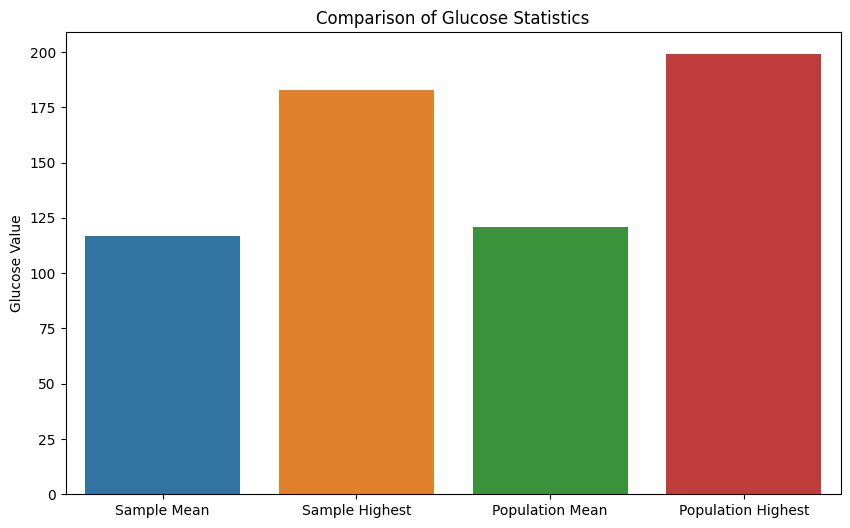

In [16]:
# Calculate the mean and highest Glucose values for the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

# Calculate the population mean and highest Glucose values
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

# Print the statistics
print("Sample Mean Glucose:", sample_mean_glucose)
print("Sample Highest Glucose:", sample_highest_glucose)
print("\nPopulation Mean Glucose:", population_mean_glucose)
print("Population Highest Glucose:", population_highest_glucose)

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Sample Mean', 'Sample Highest', 'Population Mean', 'Population Highest'],
            y=[sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Value')
plt.show()

#B

Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


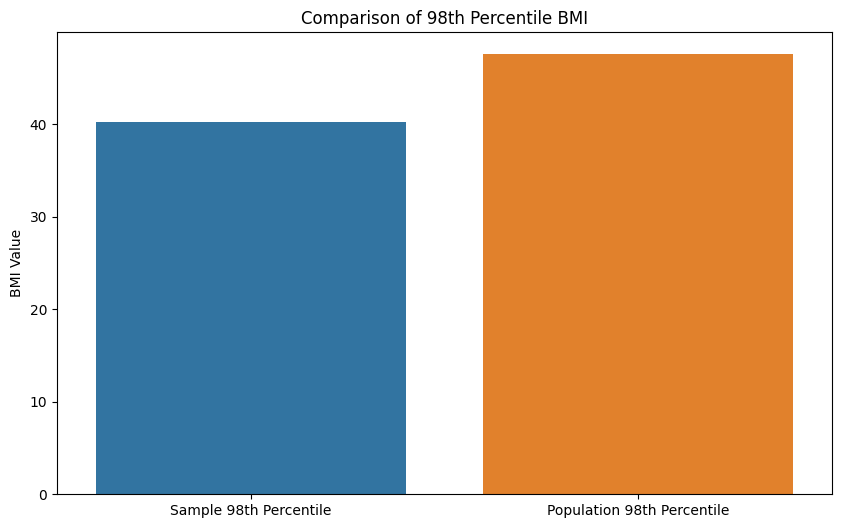

In [25]:

# Calculate the 98th percentile of BMI for the sample and the population
sample_percentile_bmi = np.percentile(sample['BMI'], 98)
population_percentile_bmi = np.percentile(data['BMI'], 98)

# Print the percentiles
print("Sample 98th Percentile BMI:", sample_percentile_bmi)
print("Population 98th Percentile BMI:", population_percentile_bmi)

# Create a bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=['Sample 98th Percentile', 'Population 98th Percentile'],
            y=[sample_percentile_bmi, population_percentile_bmi])
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.show()


#C

In [26]:
# Number of bootstrap samples and size of each sample
num_bootstrap_samples = 500
sample_size = 150

In [27]:
# Initialize arrays to store bootstrap statistics
bootstrap_means = np.zeros(num_bootstrap_samples)
bootstrap_std_devs = np.zeros(num_bootstrap_samples)
bootstrap_percentiles = np.zeros(num_bootstrap_samples)

In [28]:
# Perform bootstrap sampling
for i in range(num_bootstrap_samples):
    bootstrap_sample = data['BloodPressure'].sample(n=sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)


In [29]:
# Calculate population statistics
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 95)


In [30]:
# Print the population statistics
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation BloodPressure:", population_std_dev_bp)
print("Population 95th Percentile BloodPressure:", population_percentile_bp)

Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 95th Percentile BloodPressure: 90.0


In [31]:
# Print the average bootstrap statistics
average_bootstrap_mean = bootstrap_means.mean()
average_bootstrap_std_dev = bootstrap_std_devs.mean()
average_bootstrap_percentile = bootstrap_percentiles.mean()


In [32]:
# Print the average bootstrap statistics
print("\nAverage Bootstrap Mean BloodPressure:", average_bootstrap_mean)
print("Average Bootstrap Standard Deviation BloodPressure:", average_bootstrap_std_dev)
print("Average Bootstrap 95th Percentile BloodPressure:", average_bootstrap_percentile)



Average Bootstrap Mean BloodPressure: 69.0394
Average Bootstrap Standard Deviation BloodPressure: 19.253591701452933
Average Bootstrap 95th Percentile BloodPressure: 91.18539999999996


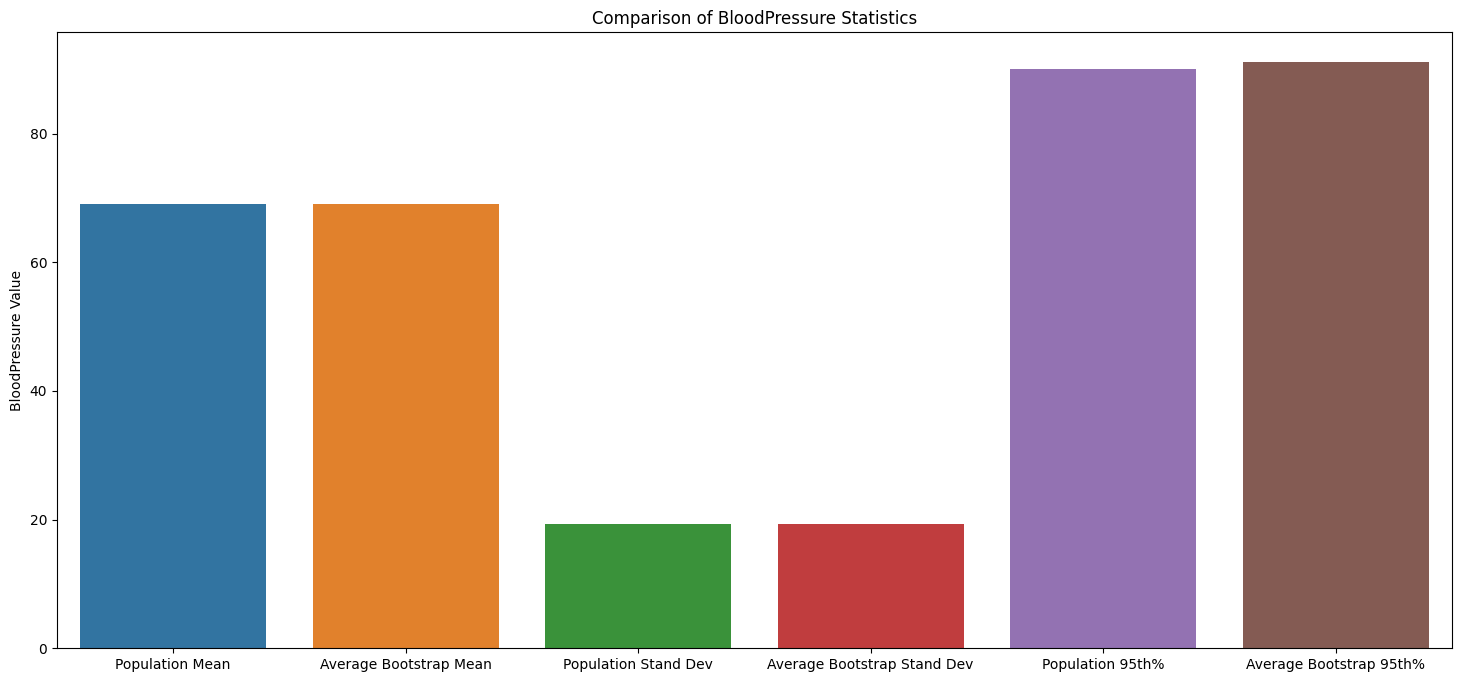

In [42]:
# Create a bar plot for comparison
plt.figure(figsize=(18, 8))
sns.barplot(
    x=['Population Mean', 'Average Bootstrap Mean',
       'Population Stand Dev', 'Average Bootstrap Stand Dev',
       'Population 95th%', 'Average Bootstrap 95th%'],
    y=[population_mean_bp, average_bootstrap_mean,
       population_std_dev_bp, average_bootstrap_std_dev,
       population_percentile_bp, average_bootstrap_percentile]
)
plt.title('Comparison of BloodPressure Statistics')
plt.ylabel('BloodPressure Value')
plt.show()

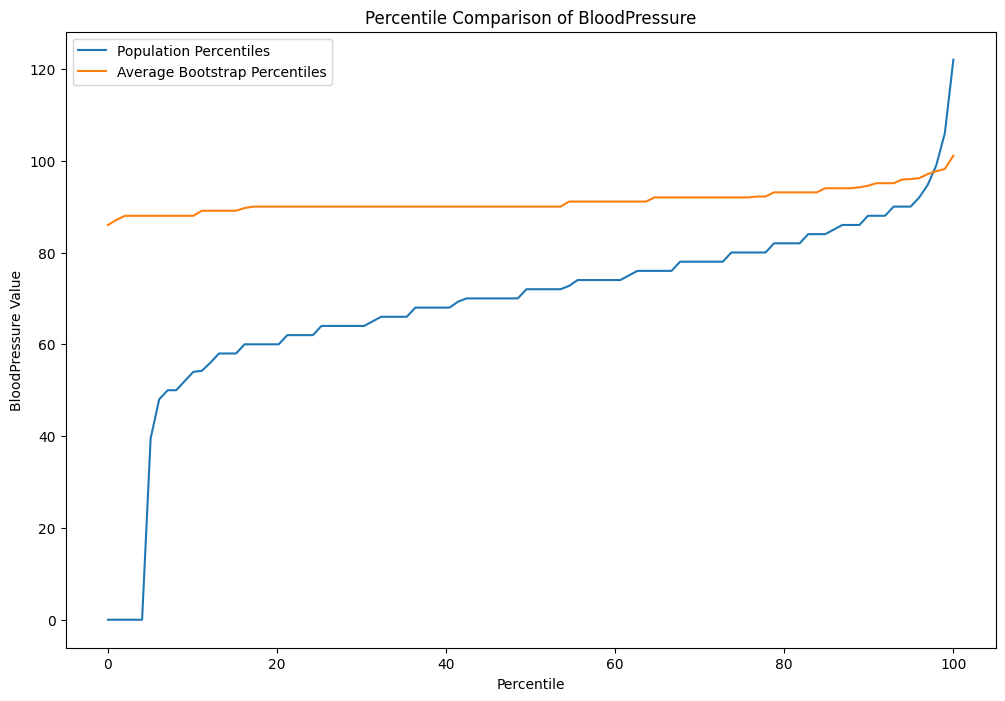

In [46]:
# Calculate population statistics
population_percentiles = np.percentile(data['BloodPressure'], np.linspace(0, 100, num=100))

# Calculate average bootstrap percentiles
average_bootstrap_percentiles = np.percentile(bootstrap_percentiles, np.linspace(0, 100, num=100))

# Plotting
plt.figure(figsize=(12, 8))

# Population Percentile Plot
sns.lineplot(x=np.linspace(0, 100, num=100), y=population_percentiles, label='Population Percentiles')

# Average Bootstrap Percentile Plot
sns.lineplot(x=np.linspace(0, 100, num=100), y=average_bootstrap_percentiles, label='Average Bootstrap Percentiles')

plt.title('Percentile Comparison of BloodPressure')
plt.xlabel('Percentile')
plt.ylabel('BloodPressure Value')

# Show the plot
plt.legend()
plt.show()